In [1]:
import pandas as pd

# Load the data (adjust the file path as needed)
data = pd.read_csv('AVGTempPak.csv')


 #Check the structure and summary
print(data.info())
filtered_data= data

target_cities = ['Peshawar', 'Islamabad', 'Karachi', 'Lahore']
filtered_data = filtered_data[filtered_data['City_name'].isin(target_cities)]

filtered_data.head()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City_name  94 non-null     object 
 1   Range      94 non-null     object 
 2   January    94 non-null     float64
 3   February   94 non-null     float64
 4   March      94 non-null     float64
 5   April      94 non-null     float64
 6   May        94 non-null     float64
 7   June       94 non-null     float64
 8   July       94 non-null     float64
 9   August     94 non-null     float64
 10  September  94 non-null     float64
 11  October    94 non-null     float64
 12  November   94 non-null     float64
 13  December   94 non-null     float64
dtypes: float64(12), object(2)
memory usage: 10.4+ KB
None


,City_name,Range,January,February,March,April,May,June,July,August,September,October,November,December
50,Peshawar,low,7.6,9.8,13.8,18.8,24.3,28.3,30.4,29.0,25.5,20.4,14.5,9.8
51,Peshawar,high,16.7,16.7,24.2,29.9,35.9,39.9,39.4,37.5,35.0,30.6,24.0,19.6
52,Islamabad,low,7.1,9.1,13.0,17.7,23.0,27.3,28.1,26.3,23.1,18.8,13.3,9.0
53,Islamabad,high,17.6,19.3,24.7,30.5,30.5,39.1,27.5,35.5,33.8,33.8,24.6,20.2
54,Karachi,low,10.4,12.7,17.6,22.3,25.9,27.9,27.4,26.1,25.2,21.0,15.9,11.6


         January   February     March      April        May       June  \
count   8.000000   8.000000   8.00000   8.000000   8.000000   8.000000   
mean   13.862500  15.775000  20.73750  25.875000  29.637500  33.137500   
std     7.172554   6.878694   7.04312   6.989942   6.244984   6.031095   
min     5.900000   8.900000  13.00000  17.700000  23.000000  27.300000   
25%     7.475000   9.625000  13.95000  19.400000  24.150000  27.775000   
50%    13.550000  14.700000  20.90000  26.100000  28.200000  31.550000   
75%    18.150000  19.975000  25.30000  31.350000  35.375000  39.300000   
max    25.800000  27.700000  31.50000  34.300000  38.600000  40.400000   

            July     August  September    October   November   December  
count   8.000000   8.000000   8.000000   8.000000   8.000000   8.000000  
mean   31.112500  30.937500  29.325000  26.300000  20.400000  15.750000  
std     4.654779   4.632475   5.207344   7.305771   7.509613   7.395559  
min    26.900000  26.100000  23.10000

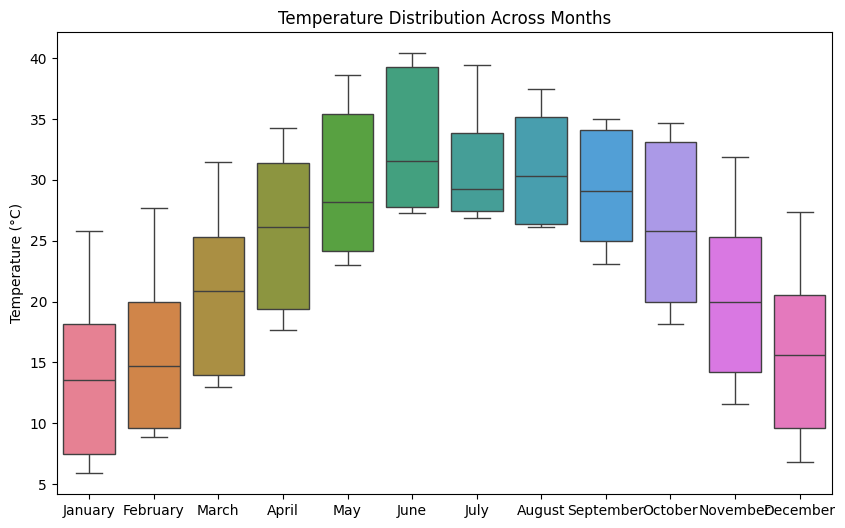

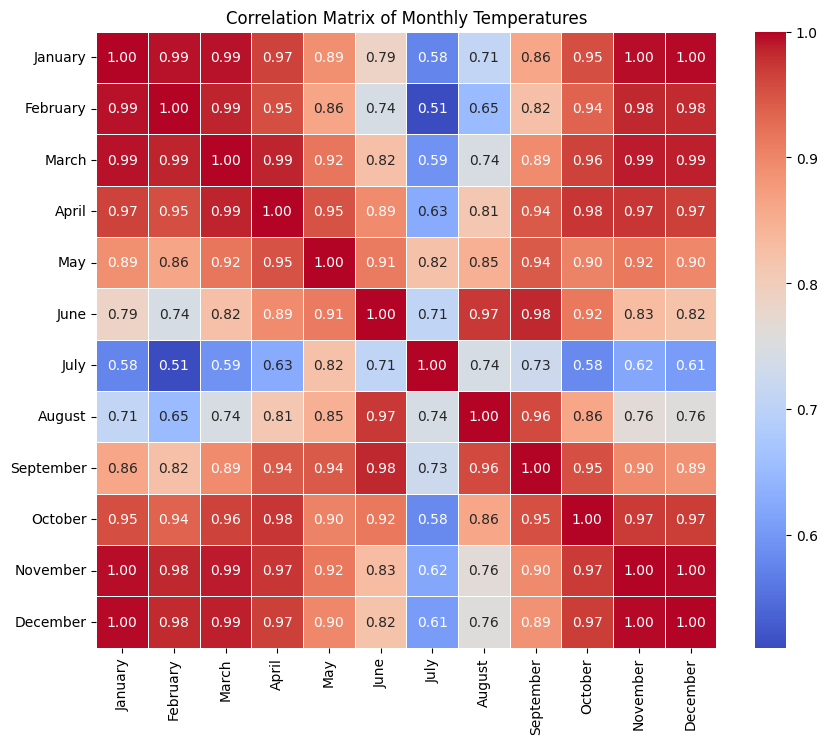

In [2]:
# Summary statistics
print(filtered_data.describe())

# Visualize the distribution of temperatures for each month
import matplotlib.pyplot as plt
import seaborn as sns

month_columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data[month_columns])
plt.title("Temperature Distribution Across Months")
plt.ylabel("Temperature (°C)")
plt.show()

# Visualize the correlation between months
correlation = filtered_data[month_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Monthly Temperatures")
plt.show()


In [3]:
 # Add a column for the monthly mean temperature
filtered_data['Monthly_Mean'] = filtered_data[month_columns].mean(axis=1)

# Create a 'Season' column (simplified version: summer vs. winter)
# Assuming that months May-August are summer, and the rest are winter
filtered_data['Season'] = filtered_data['Monthly_Mean'].apply(lambda x: 'Summer' if x > 25 else 'Winter')

# Check the new features
print(filtered_data[['City_name', 'Monthly_Mean', 'Season']].head())


    City_name  Monthly_Mean  Season
50   Peshawar     19.350000  Winter
51   Peshawar     29.116667  Summer
52  Islamabad     17.983333  Winter
53  Islamabad     28.091667  Summer
54    Karachi     20.333333  Winter


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\3531572705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Monthly_Mean'] = filtered_data[month_columns].mean(axis=1)
C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\3531572705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Season'] = filtered_data['Monthly_Mean'].apply(lambda x: 'Summer' if x > 25 else 'Winter')


In [4]:
# Detect outliers using IQR method (Interquartile Range)
Q1 = filtered_data[month_columns].quantile(0.25)
Q3 = filtered_data[month_columns].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers for each month
data_no_outliers = filtered_data[(filtered_data[month_columns] >= lower_bound) & (filtered_data[month_columns] <= upper_bound)]

# Check the result after outlier removal
print(data_no_outliers[month_columns].describe())


         January   February     March      April        May       June  \
count   8.000000   8.000000   8.00000   8.000000   8.000000   8.000000   
mean   13.862500  15.775000  20.73750  25.875000  29.637500  33.137500   
std     7.172554   6.878694   7.04312   6.989942   6.244984   6.031095   
min     5.900000   8.900000  13.00000  17.700000  23.000000  27.300000   
25%     7.475000   9.625000  13.95000  19.400000  24.150000  27.775000   
50%    13.550000  14.700000  20.90000  26.100000  28.200000  31.550000   
75%    18.150000  19.975000  25.30000  31.350000  35.375000  39.300000   
max    25.800000  27.700000  31.50000  34.300000  38.600000  40.400000   

            July     August  September    October   November   December  
count   8.000000   8.000000   8.000000   8.000000   8.000000   8.000000  
mean   31.112500  30.937500  29.325000  26.300000  20.400000  15.750000  
std     4.654779   4.632475   5.207344   7.305771   7.509613   7.395559  
min    26.900000  26.100000  23.10000

In [5]:
from sklearn.preprocessing import StandardScaler

# Apply Standardization (z-score normalization)
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(filtered_data[month_columns]), columns=month_columns)

# Check the transformed data
print(data_scaled.head())


    January  February     March     April       May      June      July  \
0 -0.933404 -0.928598 -1.053013 -1.082054 -0.913698 -0.857474 -0.163637   
1  0.422920  0.143758  0.525558  0.615585  1.072043  1.198691  1.903358   
2 -1.007928 -1.037388 -1.174442 -1.250288 -1.136238 -1.034729 -0.691869   
3  0.557062  0.547834  0.601451  0.707350  0.147647  1.056886 -0.829669   
4 -0.516074 -0.477898 -0.476228 -0.546762 -0.639802 -0.928376 -0.852635   

     August  September   October  November  December  
0 -0.447121  -0.785256 -0.863340 -0.839906 -0.860086  
1  1.514441   1.165053  0.629214  0.512485  0.556526  
2 -1.070205  -1.277965 -1.097466 -1.010734 -0.975728  
3  1.052897   0.918698  1.097466  0.597899  0.643258  
4 -1.116359  -0.846845 -0.775543 -0.640606 -0.599892  


In [6]:
print(filtered_data.dtypes)  # Check data types of each column
print(filtered_data.head())  # View the first few rows of the dataset





City_name        object
Range            object
January         float64
February        float64
March           float64
April           float64
May             float64
June            float64
July            float64
August          float64
September       float64
October         float64
November        float64
December        float64
Monthly_Mean    float64
Season           object
dtype: object
    City_name Range  January  February  March  April   May  June  July  \
50   Peshawar   low      7.6       9.8   13.8   18.8  24.3  28.3  30.4   
51   Peshawar  high     16.7      16.7   24.2   29.9  35.9  39.9  39.4   
52  Islamabad   low      7.1       9.1   13.0   17.7  23.0  27.3  28.1   
53  Islamabad  high     17.6      19.3   24.7   30.5  30.5  39.1  27.5   
54    Karachi   low     10.4      12.7   17.6   22.3  25.9  27.9  27.4   

    August  September  October  November  December  Monthly_Mean  Season  
50    29.0       25.5     20.4      14.5       9.8     19.350000  Winter  
51    3

In [7]:
# Convert month columns to numeric
month_columns = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

for col in month_columns:
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\2877737641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')


In [8]:
filtered_data

,City_name,Range,January,February,March,April,May,June,July,August,September,October,November,December,Monthly_Mean,Season
50,Peshawar,low,7.6,9.8,13.8,18.8,24.3,28.3,30.4,29.0,25.5,20.4,14.5,9.8,19.350000,Winter
51,Peshawar,high,16.7,16.7,24.2,29.9,35.9,39.9,39.4,37.5,35.0,30.6,24.0,19.6,29.116667,Summer
52,Islamabad,low,7.1,9.1,13.0,17.7,23.0,27.3,28.1,26.3,23.1,18.8,13.3,9.0,17.983333,Winter
53,Islamabad,high,17.6,19.3,24.7,30.5,30.5,39.1,27.5,35.5,33.8,33.8,24.6,20.2,28.091667,Summer
54,Karachi,low,10.4,12.7,17.6,22.3,25.9,27.9,27.4,26.1,25.2,21.0,15.9,11.6,20.333333,Winter
55,Karachi,high,25.8,27.7,31.5,34.3,35.2,34.8,33.1,31.7,32.6,34.7,31.9,27.4,31.725000,Summer
58,Lahore,low,5.9,8.9,14.0,19.6,23.7,27.4,26.9,26.4,24.4,18.2,11.6,6.8,17.816667,Winter
59,Lahore,high,19.8,22.0,27.1,33.9,38.6,40.4,36.1,35.0,35.0,32.9,27.4,21.6,30.816667,Summer


In [9]:
print(filtered_data['January'].unique())


[ 7.6 16.7  7.1 17.6 10.4 25.8  5.9 19.8]


In [10]:
#Trim Whitespace
filtered_data.columns = filtered_data.columns.str.strip()


In [11]:
filtered_data

,City_name,Range,January,February,March,April,May,June,July,August,September,October,November,December,Monthly_Mean,Season
50,Peshawar,low,7.6,9.8,13.8,18.8,24.3,28.3,30.4,29.0,25.5,20.4,14.5,9.8,19.350000,Winter
51,Peshawar,high,16.7,16.7,24.2,29.9,35.9,39.9,39.4,37.5,35.0,30.6,24.0,19.6,29.116667,Summer
52,Islamabad,low,7.1,9.1,13.0,17.7,23.0,27.3,28.1,26.3,23.1,18.8,13.3,9.0,17.983333,Winter
53,Islamabad,high,17.6,19.3,24.7,30.5,30.5,39.1,27.5,35.5,33.8,33.8,24.6,20.2,28.091667,Summer
54,Karachi,low,10.4,12.7,17.6,22.3,25.9,27.9,27.4,26.1,25.2,21.0,15.9,11.6,20.333333,Winter
55,Karachi,high,25.8,27.7,31.5,34.3,35.2,34.8,33.1,31.7,32.6,34.7,31.9,27.4,31.725000,Summer
58,Lahore,low,5.9,8.9,14.0,19.6,23.7,27.4,26.9,26.4,24.4,18.2,11.6,6.8,17.816667,Winter
59,Lahore,high,19.8,22.0,27.1,33.9,38.6,40.4,36.1,35.0,35.0,32.9,27.4,21.6,30.816667,Summer


In [12]:
#Split Concatenated Strings
filtered_data['City_name'] = filtered_data['City_name'].str.extract(r'([a-zA-Z]+)')
filtered_data


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\4153337050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['City_name'] = filtered_data['City_name'].str.extract(r'([a-zA-Z]+)')


,City_name,Range,January,February,March,April,May,June,July,August,September,October,November,December,Monthly_Mean,Season
50,Peshawar,low,7.6,9.8,13.8,18.8,24.3,28.3,30.4,29.0,25.5,20.4,14.5,9.8,19.350000,Winter
51,Peshawar,high,16.7,16.7,24.2,29.9,35.9,39.9,39.4,37.5,35.0,30.6,24.0,19.6,29.116667,Summer
52,Islamabad,low,7.1,9.1,13.0,17.7,23.0,27.3,28.1,26.3,23.1,18.8,13.3,9.0,17.983333,Winter
53,Islamabad,high,17.6,19.3,24.7,30.5,30.5,39.1,27.5,35.5,33.8,33.8,24.6,20.2,28.091667,Summer
54,Karachi,low,10.4,12.7,17.6,22.3,25.9,27.9,27.4,26.1,25.2,21.0,15.9,11.6,20.333333,Winter
55,Karachi,high,25.8,27.7,31.5,34.3,35.2,34.8,33.1,31.7,32.6,34.7,31.9,27.4,31.725000,Summer
58,Lahore,low,5.9,8.9,14.0,19.6,23.7,27.4,26.9,26.4,24.4,18.2,11.6,6.8,17.816667,Winter
59,Lahore,high,19.8,22.0,27.1,33.9,38.6,40.4,36.1,35.0,35.0,32.9,27.4,21.6,30.816667,Summer


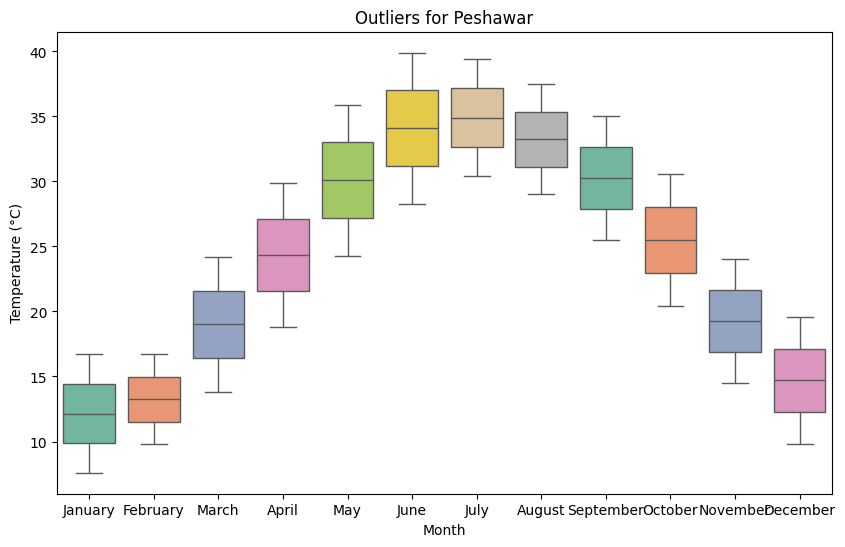

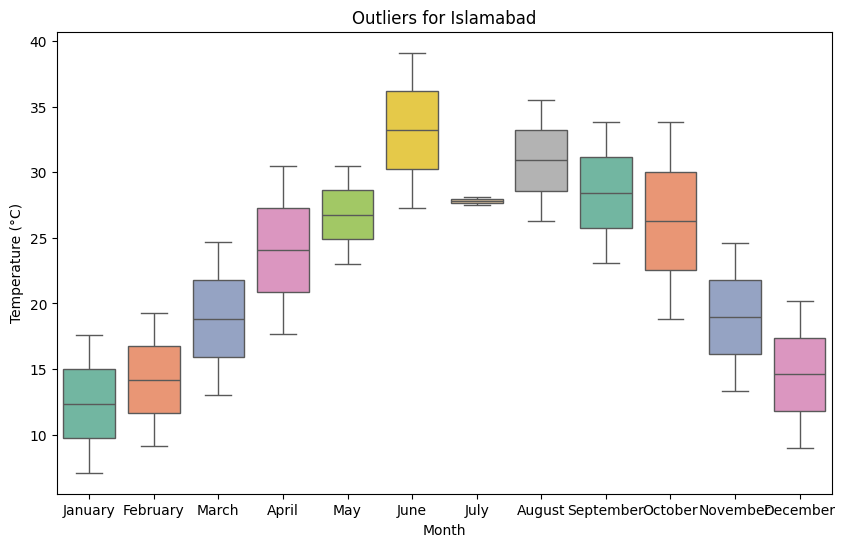

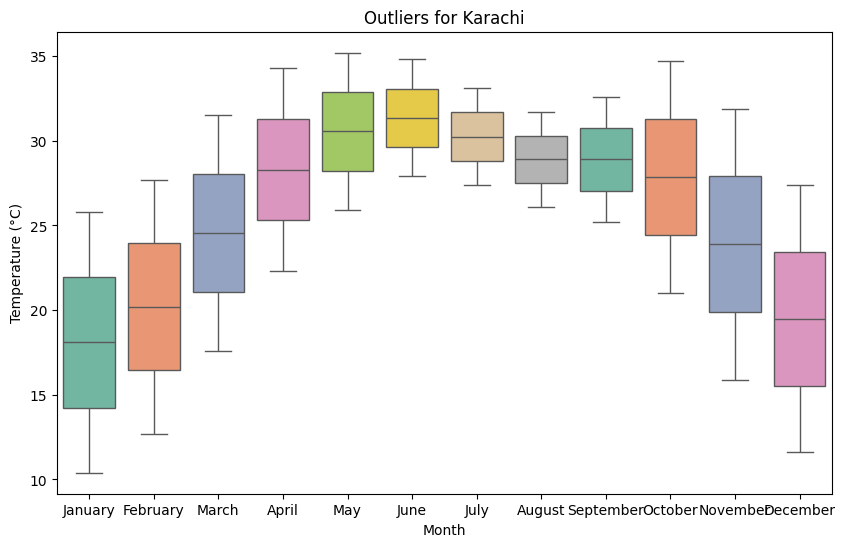

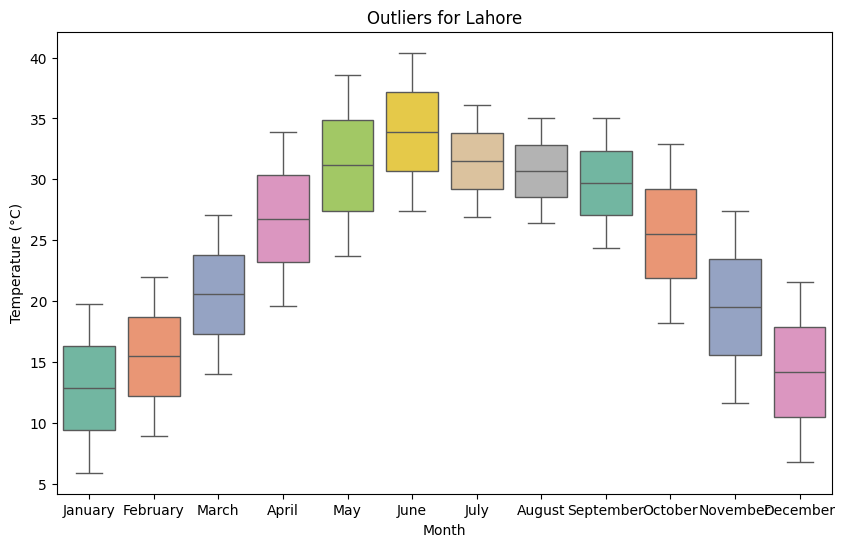

In [13]:
for city in filtered_data['City_name'].unique():
    plt.figure(figsize=(10, 6))
    
    # Filter the data for the current city
    city_data = filtered_data[filtered_data['City_name'] == city]
    
    # Create boxplots for all months for the current city
    sns.boxplot(data=city_data[month_columns], palette='Set2')
    plt.title(f'Outliers for {city}')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    
    # Show plot
    plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# Assume 'filtered_data' contains the data filtered for specific cities
# Prepare the data by selecting only the temperature columns for standardization
month_columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the temperature data
standardized_data = scaler.fit_transform(filtered_data[month_columns])

# Convert the standardized data back to a DataFrame for easy viewing
standardized_df = pd.DataFrame(standardized_data, columns=month_columns)

# If you want to add it back to the original DataFrame
filtered_data[month_columns] = standardized_df

# Display the standardized data
print(standardized_df.head())

    January  February     March     April       May      June      July  \
0 -0.933404 -0.928598 -1.053013 -1.082054 -0.913698 -0.857474 -0.163637   
1  0.422920  0.143758  0.525558  0.615585  1.072043  1.198691  1.903358   
2 -1.007928 -1.037388 -1.174442 -1.250288 -1.136238 -1.034729 -0.691869   
3  0.557062  0.547834  0.601451  0.707350  0.147647  1.056886 -0.829669   
4 -0.516074 -0.477898 -0.476228 -0.546762 -0.639802 -0.928376 -0.852635   

     August  September   October  November  December  
0 -0.447121  -0.785256 -0.863340 -0.839906 -0.860086  
1  1.514441   1.165053  0.629214  0.512485  0.556526  
2 -1.070205  -1.277965 -1.097466 -1.010734 -0.975728  
3  1.052897   0.918698  1.097466  0.597899  0.643258  
4 -1.116359  -0.846845 -0.775543 -0.640606 -0.599892  


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\3553282421.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[month_columns] = standardized_df


In [15]:
# Function to categorize each month based on temperature
def categorize_season(row):
    avg_temp = row[month_columns].mean()
    if avg_temp <= 10:
        return 'Winter'
    elif 10 < avg_temp <= 20:
        return 'Spring'
    elif 20 < avg_temp <= 30:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to each row in the dataset
filtered_data['Season'] = filtered_data.apply(categorize_season, axis=1)

# Display the first few rows with the new feature
print(filtered_data[['City_name', 'Season']].head())


    City_name Season
50   Peshawar   Fall
51   Peshawar   Fall
52  Islamabad   Fall
53  Islamabad   Fall
54    Karachi   Fall


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\1827989664.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Season'] = filtered_data.apply(categorize_season, axis=1)


In [16]:
# Add latitude and longitude for each city (example data)
city_coords = {
    'Peshawar': {'latitude': 34.0151, 'longitude': 71.5249},
    'Islamabad': {'latitude': 33.6844, 'longitude': 73.0479},
    'Lahore': {'latitude': 31.5497, 'longitude': 74.3436},
    'Karachi': {'latitude': 24.8607, 'longitude': 67.0011}
}

# Create two new columns for latitude and longitude
filtered_data['latitude'] = filtered_data['City_name'].map(lambda x: city_coords.get(x, {}).get('latitude'))
filtered_data['longitude'] = filtered_data['City_name'].map(lambda x: city_coords.get(x, {}).get('longitude'))

# Display the first few rows with the new geographical data
print(filtered_data[['City_name', 'latitude', 'longitude']].head())


    City_name  latitude  longitude
50   Peshawar   34.0151    71.5249
51   Peshawar   34.0151    71.5249
52  Islamabad   33.6844    73.0479
53  Islamabad   33.6844    73.0479
54    Karachi   24.8607    67.0011


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\2709691348.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['latitude'] = filtered_data['City_name'].map(lambda x: city_coords.get(x, {}).get('latitude'))
C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\2709691348.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['longitude'] = filtered_data['City_name'].map(lambda x: city_coords.get(x, {}).get('longitude'))


In [17]:
#handling errors

In [18]:
# Impute missing values in categorical columns with the mode (most frequent value)
filtered_data['City_name'] = filtered_data['City_name'].fillna(filtered_data['City_name'].mode()[0])

# If there are other categorical columns, apply similar logic
print(filtered_data['City_name'].head())


50     Peshawar
51     Peshawar
52    Islamabad
53    Islamabad
54      Karachi
Name: City_name, dtype: object


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\3502752021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['City_name'] = filtered_data['City_name'].fillna(filtered_data['City_name'].mode()[0])


In [19]:
# Flagging out-of-range values for each month
def flag_out_of_range(row):
    flags = []
    for month in month_columns:
        if row[month] < -50 or row[month] > 50:  # Example range for temperature
            flags.append(f'{month}_out_of_range')
    return flags if flags else None  # Return None if no flags

# Apply the flagging function
filtered_data['flags'] = filtered_data.apply(flag_out_of_range, axis=1)

# Display rows with flags
print(filtered_data[['City_name', 'flags']].head())


    City_name flags
50   Peshawar  None
51   Peshawar  None
52  Islamabad  None
53  Islamabad  None
54    Karachi  None


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\3605926791.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['flags'] = filtered_data.apply(flag_out_of_range, axis=1)


In [20]:
# Calculate the monthly mean for each row and store it in a new column 'Monthly_Mean'
filtered_data['Monthly_Mean'] = filtered_data[month_columns].mean(axis=1)

# Now, you can fill any missing values in 'Monthly_Mean' with the median
filtered_data['Monthly_Mean'] = filtered_data['Monthly_Mean'].fillna(filtered_data['Monthly_Mean'].median())


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\403380661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Monthly_Mean'] = filtered_data[month_columns].mean(axis=1)
C:\Users\ANWAR KHAN\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\403380661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for temperature distribution by month
sns.boxplot(x='Month', y='Temperature', data=filtered_data)
plt.title("Monthly Temperature Distribution")
plt.show()

# Line plot for temperature trends
filtered_data.plot(x='Month', y=['Peshawar', 'Islamabad', 'Karachi', 'Lahore'], kind='line')


ValueError: Could not interpret value `Month` for `x`. An entry with this name does not appear in `data`.

   City_name    Month  Temperature
0   Peshawar  January          7.6
1   Peshawar  January         16.7
2  Islamabad  January          7.1
3  Islamabad  January         17.6
4    Karachi  January         10.4


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\2124314979.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='City')


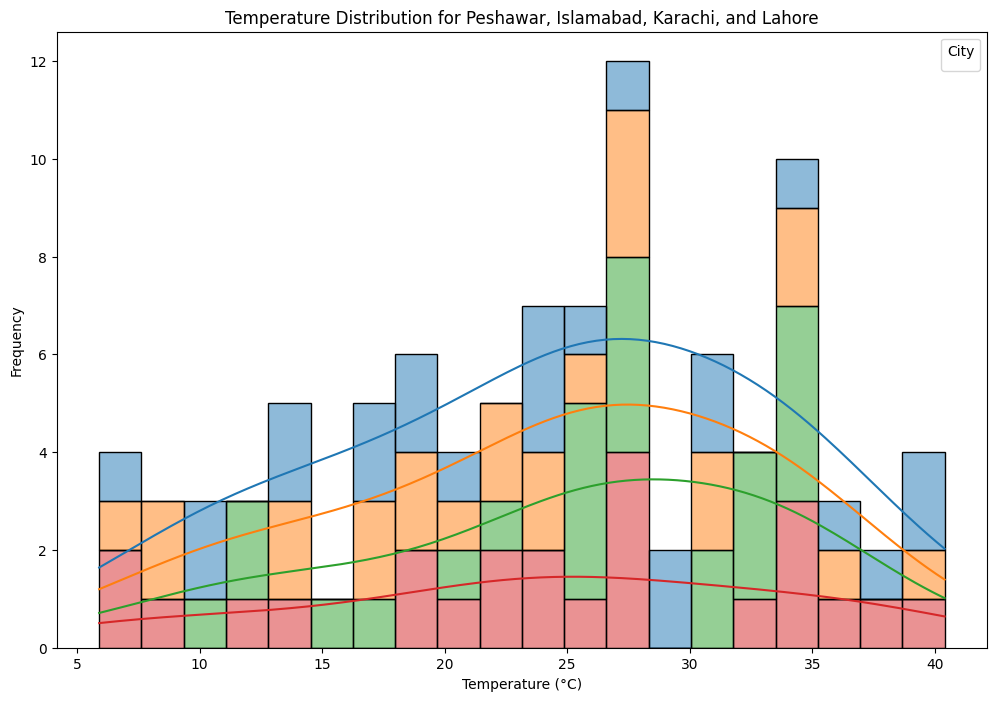

In [25]:
# Assuming 'filtered_data' contains the data for the four cities
target_cities = ['Peshawar', 'Islamabad', 'Karachi', 'Lahore']
filtered_data = data[data['City_name'].isin(target_cities)]

# Melt the data to create a 'Month' column and a 'Temperature' column
temperature_data = pd.melt(filtered_data, id_vars=['City_name'], 
                           value_vars=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                           var_name='Month', value_name='Temperature')

# Check the first few rows to confirm the data format
print(temperature_data.head())

# Plot the histogram for each city
plt.figure(figsize=(12, 8))
sns.histplot(temperature_data, x='Temperature', hue='City_name', multiple='stack', kde=True, bins=20)
plt.title('Temperature Distribution for Peshawar, Islamabad, Karachi, and Lahore')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend(title='City')
plt.show()

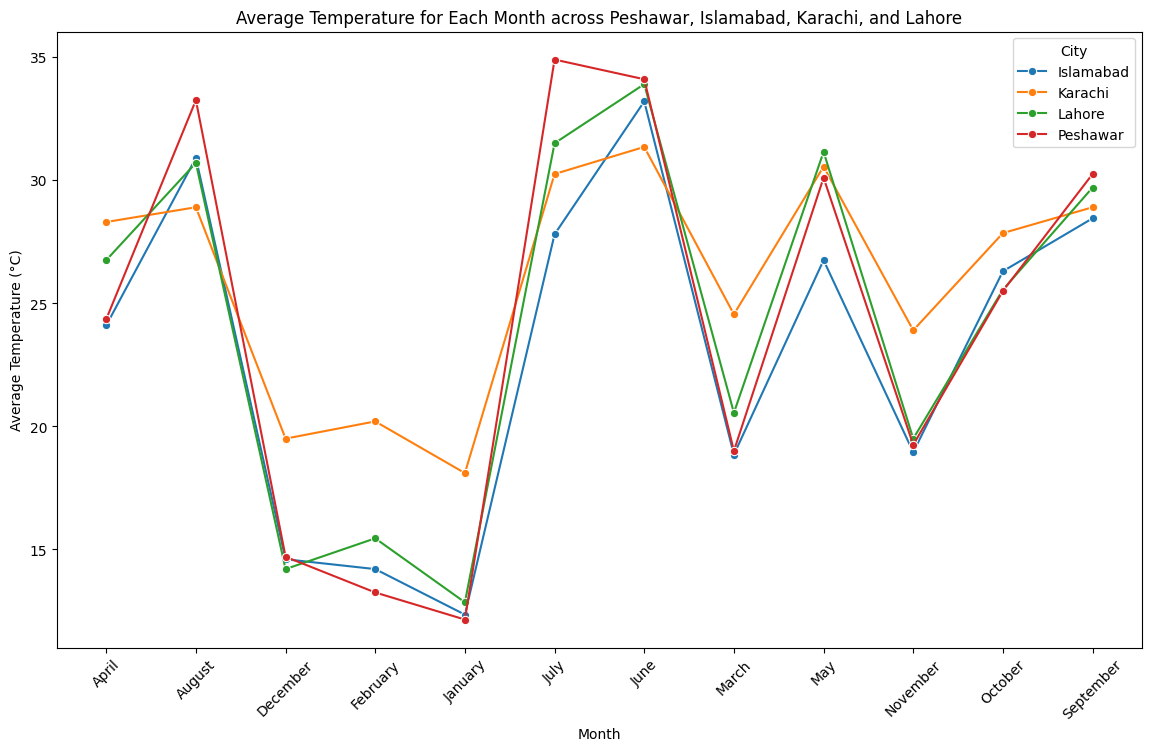

In [26]:
# Calculate the mean temperature for each city-month combination
monthly_avg = temperature_data.groupby(['City_name', 'Month'])['Temperature'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_avg, x='Month', y='Temperature', hue='City_name', marker='o')
plt.title('Average Temperature for Each Month across Peshawar, Islamabad, Karachi, and Lahore')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()


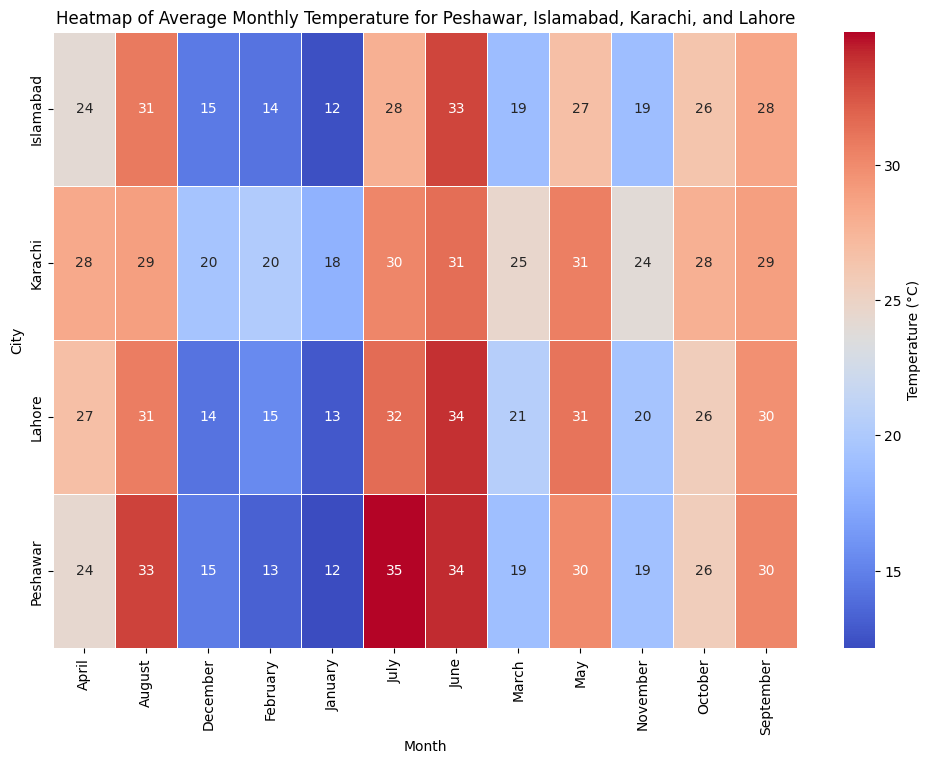

In [27]:
# Pivot the data for heatmap visualization
temperature_pivot = temperature_data.pivot_table(index='City_name', columns='Month', values='Temperature', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(temperature_pivot, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Temperature (°C)'})
plt.title('Heatmap of Average Monthly Temperature for Peshawar, Islamabad, Karachi, and Lahore')
plt.xlabel('Month')
plt.ylabel('City')
plt.show()


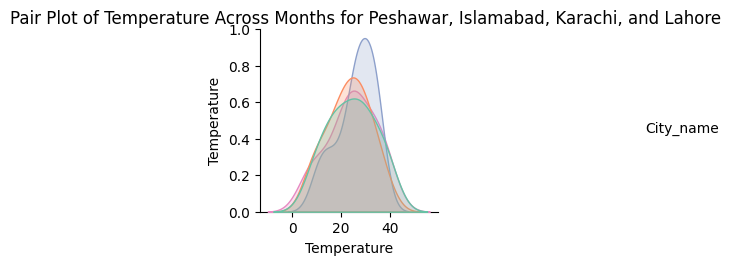

In [28]:
# First, let's filter data for the four cities
filtered_data = data[data['City_name'].isin(target_cities)]

# Extract the months to compare in the pairplot
pairplot_data = filtered_data[['City_name', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

# Melt the data for easier plotting
pairplot_data = pd.melt(pairplot_data, id_vars=['City_name'], var_name='Month', value_name='Temperature')

# Plot the pairplot
sns.pairplot(pairplot_data, hue='City_name', palette='Set2', markers=['o', 's', 'D', 'v'])
plt.suptitle('Pair Plot of Temperature Across Months for Peshawar, Islamabad, Karachi, and Lahore', y=1.02)
plt.show()


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\719479565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=temperature_data, x='City_name', y='Temperature', palette='Set2')


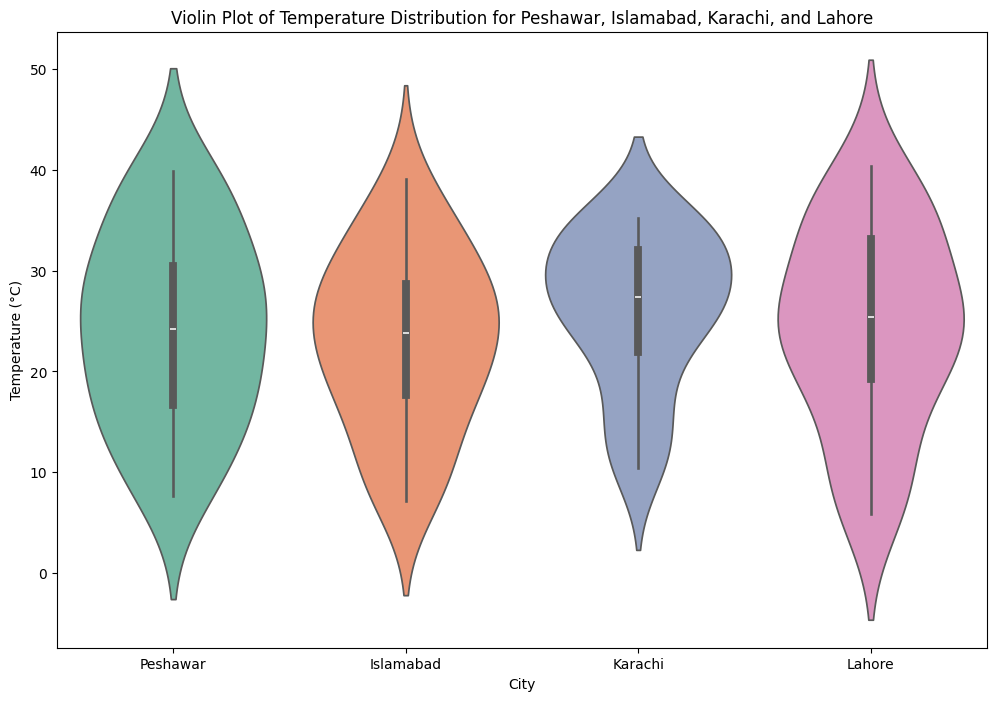

In [29]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=temperature_data, x='City_name', y='Temperature', palette='Set2')
plt.title('Violin Plot of Temperature Distribution for Peshawar, Islamabad, Karachi, and Lahore')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()


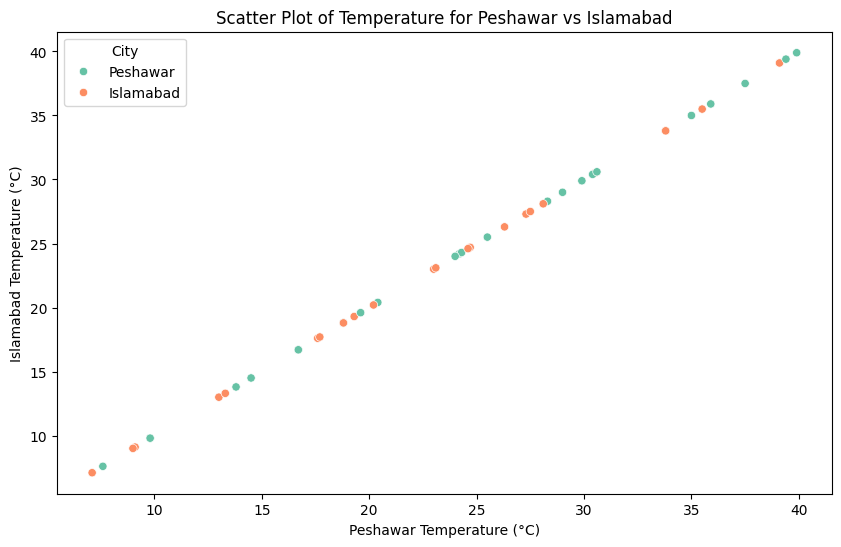

In [30]:
# Filter data for Peshawar and Islamabad
city_comparison_data = temperature_data[temperature_data['City_name'].isin(['Peshawar', 'Islamabad'])]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=city_comparison_data, x='Temperature', y='Temperature', hue='City_name', palette='Set2')
plt.title('Scatter Plot of Temperature for Peshawar vs Islamabad')
plt.xlabel('Peshawar Temperature (°C)')
plt.ylabel('Islamabad Temperature (°C)')
plt.legend(title='City')
plt.show()


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\363981006.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='City')


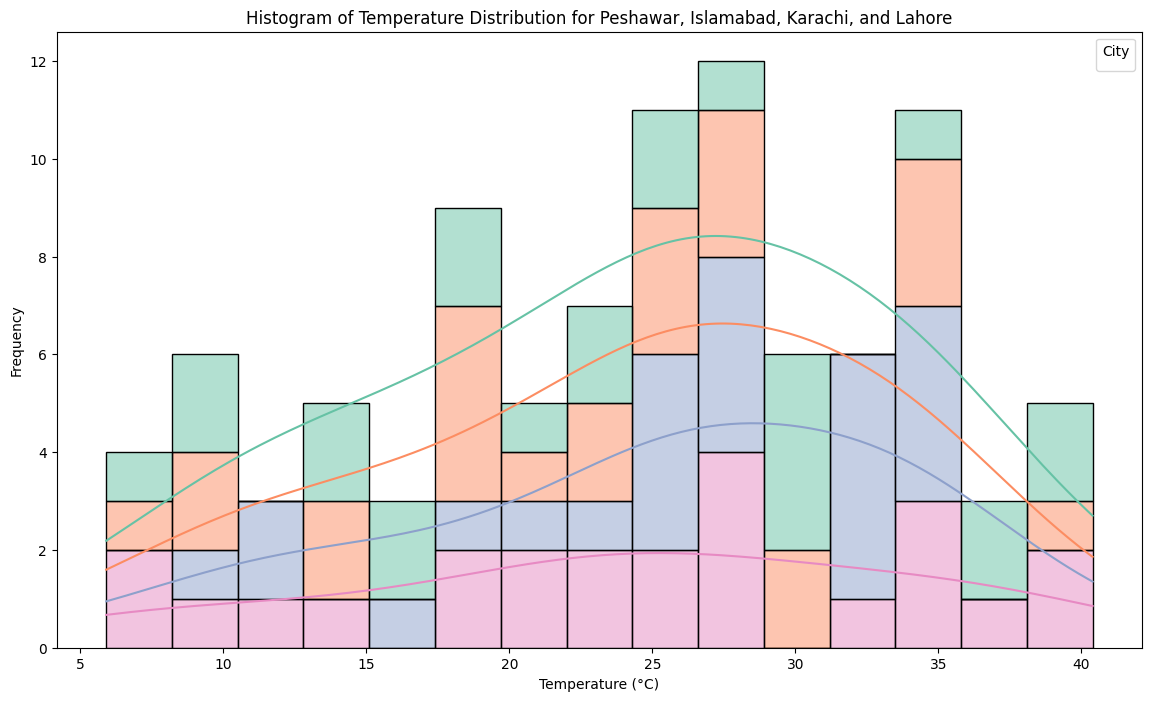

In [31]:
# Plotting histograms for temperature distribution for each city
plt.figure(figsize=(14, 8))
sns.histplot(data=temperature_data, x='Temperature', hue='City_name', multiple='stack', kde=True, bins=15, palette='Set2')

plt.title('Histogram of Temperature Distribution for Peshawar, Islamabad, Karachi, and Lahore')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend(title='City')
plt.show()


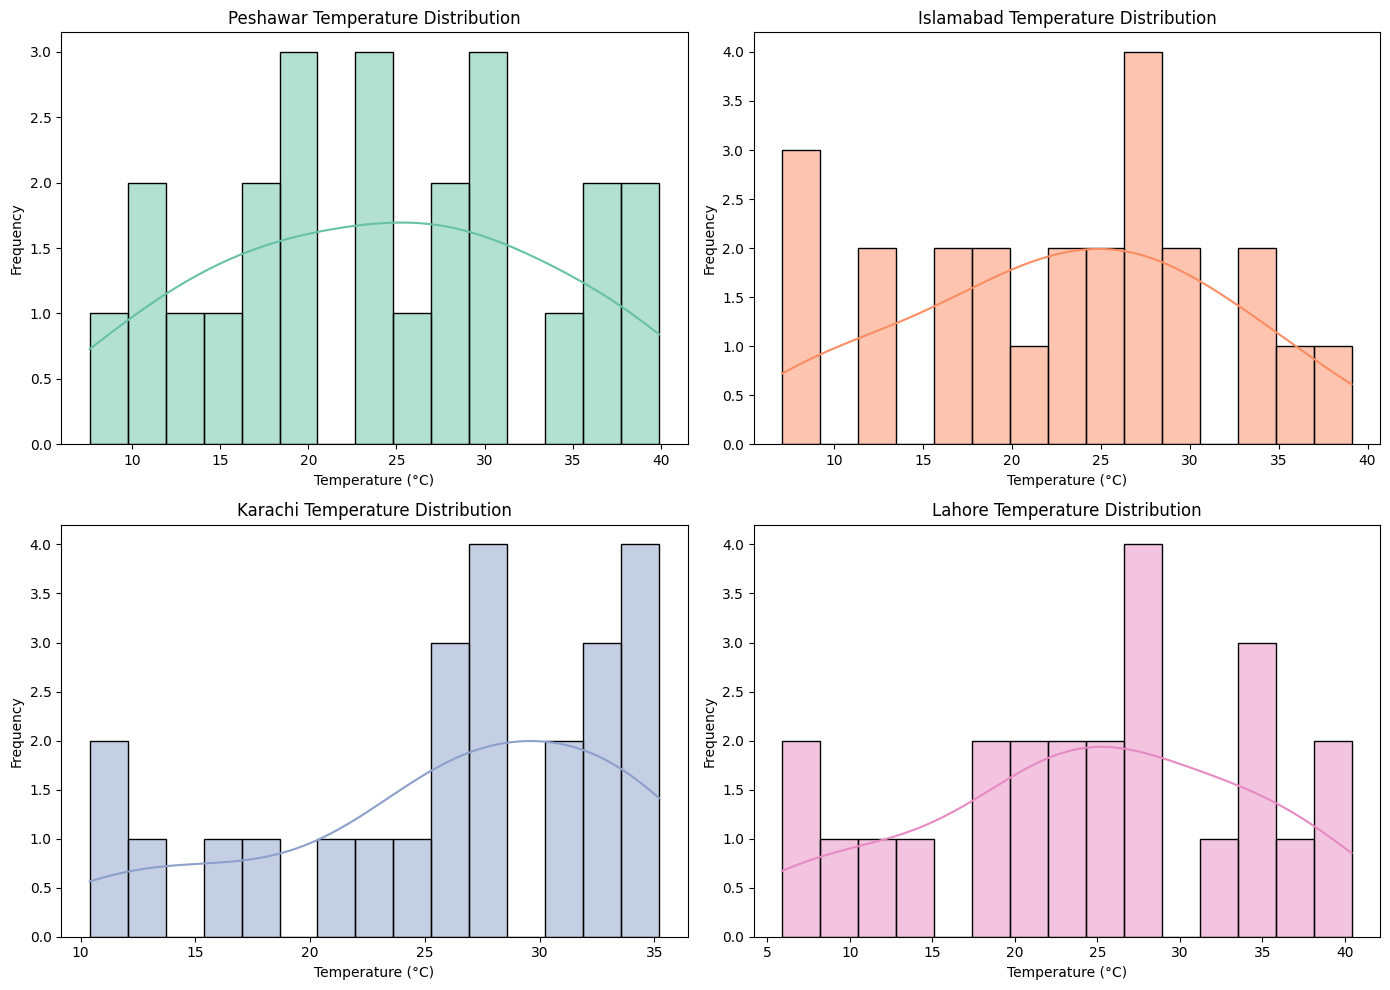

In [32]:
# Plotting individual histograms for each city
cities = ['Peshawar', 'Islamabad', 'Karachi', 'Lahore']

plt.figure(figsize=(14, 10))

for i, city in enumerate(cities, 1):
    plt.subplot(2, 2, i)
    city_data = temperature_data[temperature_data['City_name'] == city]
    
    sns.histplot(city_data['Temperature'], bins=15, kde=True, color=sns.color_palette('Set2')[i-1])
    
    plt.title(f'{city} Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\3985901103.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temperature.index, y=avg_temperature.values, palette='Set2')


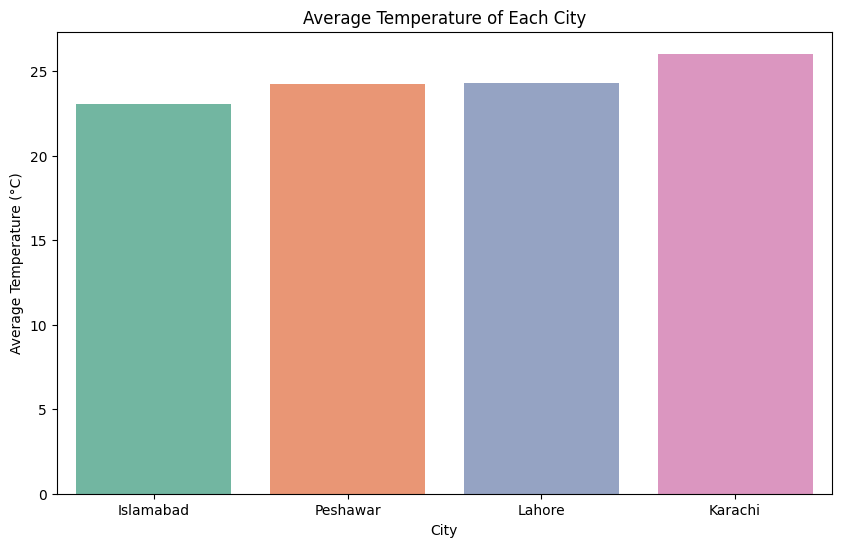

In [33]:
# Calculating the average temperature for each city
avg_temperature = temperature_data.groupby('City_name')['Temperature'].mean().sort_values()

# Plotting a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_temperature.index, y=avg_temperature.values, palette='Set2')

plt.title('Average Temperature of Each City')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.show()


C:\Users\ANWAR KHAN\AppData\Local\Temp\ipykernel_11116\240610186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City_name', y='Temperature', data=temperature_data, palette='Set2')


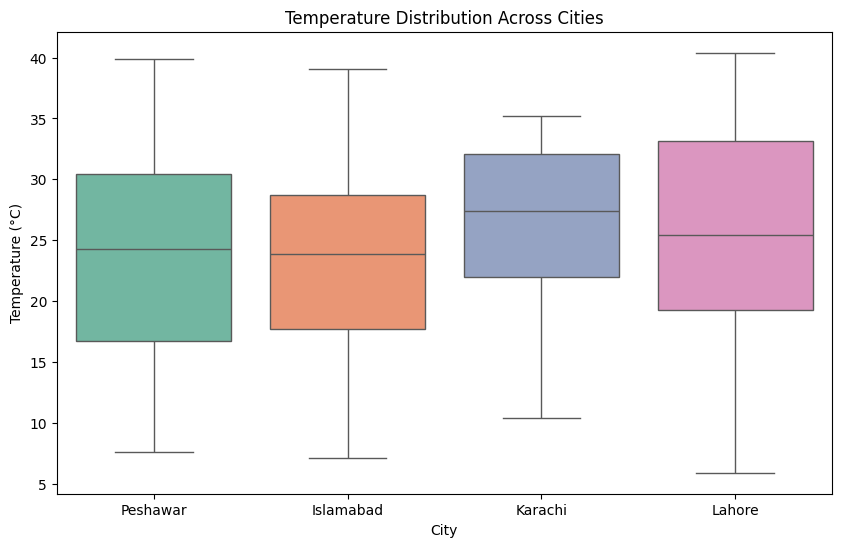

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_name', y='Temperature', data=temperature_data, palette='Set2')

plt.title('Temperature Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()


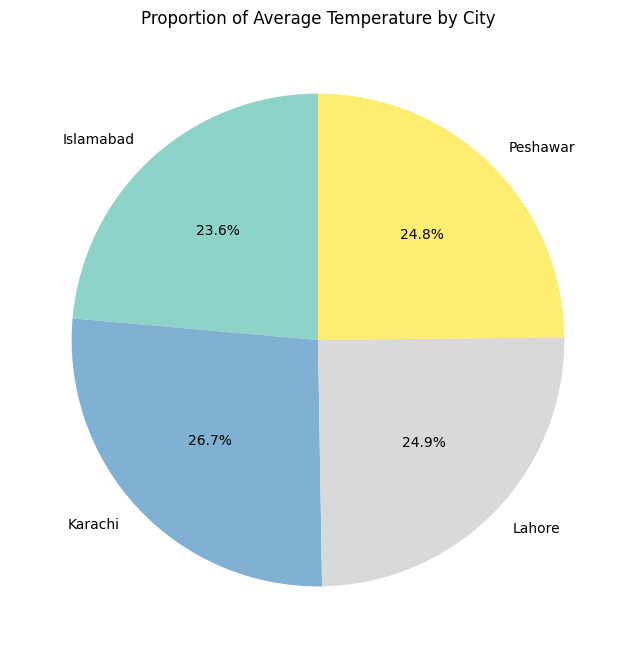

In [35]:
# Calculate the average temperature for each city
avg_temperature = temperature_data.groupby('City_name')['Temperature'].mean()

# Pie chart
plt.figure(figsize=(8, 8))
avg_temperature.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')

plt.title('Proportion of Average Temperature by City')
plt.ylabel('')  # Hides the ylabel for a cleaner look
plt.show()


In [39]:
# Assuming 'temperature_data' is your pre-processed DataFrame
filtered_data.to_csv('pre_processed_temperature_data.csv', index=True)
